In [15]:
##running functions in Main_code
%run Main_code

# Defining used sport facility
lipastype = "1350"
lipasname = "jalkapallostadion"

# Fetching Lipas data
lipas_data = GetLipasData(lipastype,lipasname)

# Creating ykr-list
ykr_list = CreateYkrList(lipas_data)

# Formulate filepaths for travel time data
filepaths = FileFinder(ykr_list)

# Join travel time files into YKR-grid and create a single geodataframe with minimum travel times
geodata = TableJoiner(filepaths)

geodata.head()

Processing file data/HelsinkiTravelTimeMatrix2018/5936xxx/travel_times_to_ 5936682.txt. Progress: 1/4
Processing file data/HelsinkiTravelTimeMatrix2018/5967xxx/travel_times_to_ 5967140.txt. Progress: 2/4
Processing file data/HelsinkiTravelTimeMatrix2018/5961xxx/travel_times_to_ 5961882.txt. Progress: 3/4
Processing file data/HelsinkiTravelTimeMatrix2018/5900xxx/travel_times_to_ 5900202.txt. Progress: 4/4


,x,y,YKR_ID,geometry,bike_f_t_0,pt_r_t_0,car_r_t_0,bike_f_t_1,pt_r_t_1,car_r_t_1,bike_f_t_2,pt_r_t_2,car_r_t_2,bike_f_t_3,pt_r_t_3,car_r_t_3,min_t_bike,min_t_car,min_t_pt
0,381875.0,6697880.0,5785640,"POLYGON ((382000.000 6697750.000, 381750.000 6...",74.0,130.0,52.0,87.0,144,58.0,77.0,120,54.0,54.0,104,40.0,54.0,40.0,104.0
1,382125.0,6697880.0,5785641,"POLYGON ((382250.000 6697750.000, 382000.000 6...",77.0,133.0,54.0,87.0,147,61.0,77.0,123,56.0,53.0,107,43.0,53.0,43.0,107.0
2,382375.0,6697880.0,5785642,"POLYGON ((382500.000 6697750.000, 382250.000 6...",77.0,134.0,54.0,87.0,148,61.0,77.0,124,56.0,53.0,108,43.0,53.0,43.0,108.0
3,382625.0,6697880.0,5785643,"POLYGON ((382750.000 6697750.000, 382500.000 6...",82.0,138.0,55.0,92.0,153,61.0,82.0,129,56.0,58.0,113,43.0,58.0,43.0,113.0
4,381125.0,6697630.0,5787544,"POLYGON ((381250.000 6697500.000, 381000.000 6...",73.0,123.0,51.0,86.0,137,58.0,75.0,113,53.0,52.0,97,40.0,52.0,40.0,97.0


In [16]:
# Saving minimum travel times of each travel method to tiff-raster in outputs folder
GeodataframeToTiff(geodata, lipastype, lipasname)

Files saved.


In [29]:
# Tässä alla vielä erikseen make_geocube tuotokset plotattuna - ei merkittävä, voi poistaa tieltä
from geocube.api.core import make_geocube

# määritellään mistä attribuuteista tehdään rasterit
attr_list = ["min_t_bike","min_t_pt","min_t_car"]

# luodaan geocube 250m spat.resoluutiolle
cube = make_geocube(vector_data=geodata, measurements= attr_list, resolution=(250, -250))

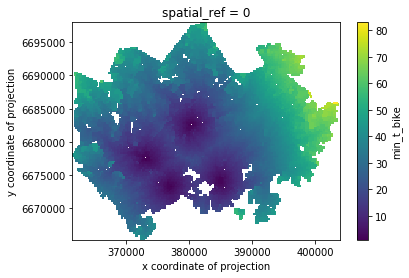

In [30]:
cube.min_t_bike.plot()

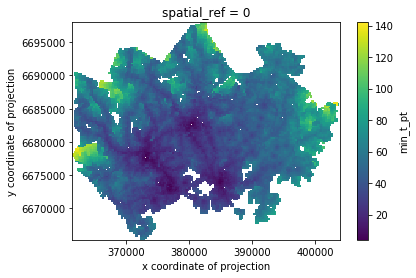

In [31]:
cube.min_t_pt.plot()

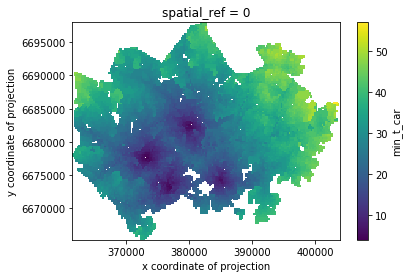

In [32]:
cube.min_t_car.plot()